- ##### Title: Predict whether a person will accept the coupon recommended to him in different driving scenarios

## References: 
For dataset:
https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

## Introduction:
This data studies whether a person will accept the coupon recommended to him in different driving scenarios. The dataset has 12684 number of instances along with 23 number of attributes. This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, Time etc., and then ask the person whether he will accept the coupon if he is the driver. In the machine learning pipeline, I selected the features using the variance threshold and then I scaled the features using RobustScaling technique. After that, I fit the model using different classifiers and I also used GridSearchCV for hypertuning. After fitting all the models, I choosed the best model based on accuracy and then I predicted my results based on the unseen data i.e. out of sample dataset.


## 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

## 2) Loading dataset

In [2]:
def load_course_data(filename):
    return pd.read_csv(filename)

# data is loaded here.
data = load_course_data("Dataset/Project_GSh43374_prepared.csv")
data


# provide the summary of the data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 70 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Temperature                                       12007 non-null  int64  
 1   Expiration                                        12007 non-null  float64
 2   Has_children                                      12007 non-null  int64  
 3   Direction_same                                    12007 non-null  int64  
 4   Y                                                 12007 non-null  int64  
 5   Time(in_AM)                                       12007 non-null  int64  
 6   ToCoupon_inMins                                   12007 non-null  int64  
 7   Destination_No Urgent Place                       12007 non-null  int64  
 8   Destination_Work                                  12007 non-null  int64  
 9   Passanger_Friend(

## 2.1) Checking unique values of response variable 'Y'

1    6825
0    5182
Name: Y, dtype: int64


<AxesSubplot:xlabel='Y', ylabel='count'>

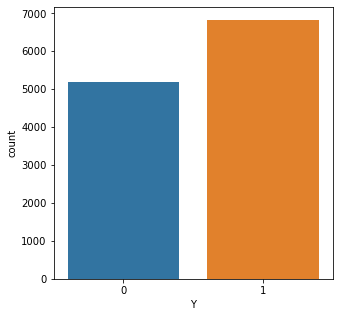

In [3]:
# checking the unique values
data['Y'].unique()
# counting the uniques values
print(data['Y'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(data=data, x="Y")

In [4]:
print('Out of 100%, nearly {}% belongs to positive class'.format(round(sum(data.Y/len(data.Y)*100))))

Out of 100%, nearly 57% belongs to positive class


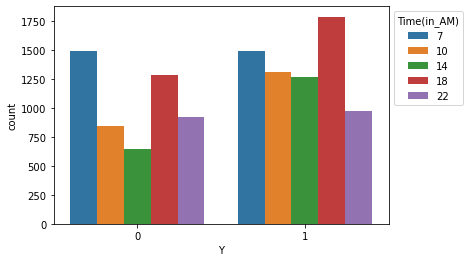

In [5]:
# plot for relationship between Y and Time
p = sns.countplot(data=data, x='Y', hue='Time(in_AM)')
p.legend(title='Time(in_AM)', bbox_to_anchor=(1, 1), loc='upper left')


From above graph, the graph shows that people at time, specifically at 18 PM are highly likely to accept the coupons. They are less likely to accept the coupons when time is 14PM, 10AM.

<AxesSubplot:xlabel='Has_children', ylabel='count'>

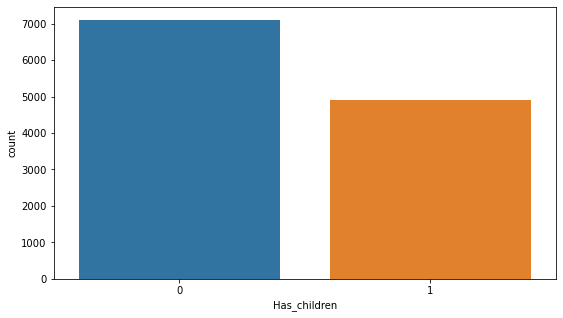

In [6]:
# checking the unique values
data['Has_children'].unique()
# counting the uniques values
data['Has_children'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=data, x="Has_children")

From here, we can see that we have higher counts when people donot have children.

## 3) Feature Engineering

### 3.1) Defining the predictors/features (X) and outcome/predictions (Y)

In [7]:
features = data.drop(['Y'], axis=1)
target = data['Y']


### 3.1) Feature Transformation
 In our case, dummy coding transform is used and it tranforms one feature into m-1 features.

### 3.2) Feature Selection
The variance threshold feature selection technique is used to select the feature for further analysis.

### 3.2.1) Using Variance Threshold

In [8]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=.15)
vt.fit(features)
#VarianceThreshold(threshold=0.15)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=features.columns).T

,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Passanger_Kid(s),...,Carryaway_less1,Carryaway_never,Restaurantlessthan20_4~8,Restaurantlessthan20_gt8,Restaurantlessthan20_less1,Restaurantlessthan20_never,Restaurant20to50_4~8,Restaurant20to50_gt8,Restaurant20to50_less1,Restaurant20to50_never
variance,365.98919,0.206924,0.241691,0.16932,29.18166,0.451635,0.249982,0.186423,0.193204,0.071667,...,0.126445,0.01071,0.203847,0.095371,0.137878,0.014362,0.053722,0.021504,0.249779,0.141913
select_feature,True,True,True,True,True,True,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [9]:
X_1 = features.iloc[:,vt.get_support()]
print(X_1.shape)
X_1.head()

(12007, 28)


,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Weather_Sunny,...,Education_Some college - no degree,Occupation_business_&_education,Occupation_others,Bar_less1,Bar_never,Coffeehouse_less1,Coffeehouse_never,Carryaway_4~8,Restaurantlessthan20_4~8,Restaurant20to50_less1
0,55,1.000,0,0,14,1,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
1,80,0.084,0,0,10,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1
2,80,1.000,0,0,10,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1
3,80,0.084,0,0,10,2,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1
4,80,1.000,0,0,14,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1


## 3.3) Data for out of sample prediction

In [10]:
df = data.sample(frac=0.95, random_state=42)
df_unseen = data.drop(df.index)
df.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(df.shape))

Data for Modeling: (11407, 70)


In [11]:
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Unseen Data For Predictions: (600, 70)


## 3.4) Feature Scaling

### 3.4.1) Using Robust Scaler

In [12]:
# constructing the pipeline

# robust scaling method is used
robustScaler = RobustScaler()


In [13]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_1, target, test_size=0.25, random_state=42)
X_train.head()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 10810 to 9061
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Temperature                         3002 non-null   int64  
 1   Expiration                          3002 non-null   float64
 2   Has_children                        3002 non-null   int64  
 3   Direction_same                      3002 non-null   int64  
 4   Time(in_AM)                         3002 non-null   int64  
 5   ToCoupon_inMins                     3002 non-null   int64  
 6   Destination_No Urgent Place         3002 non-null   int64  
 7   Destination_Work                    3002 non-null   int64  
 8   Passanger_Friend(s)                 3002 non-null   int64  
 9   Weather_Sunny                       3002 non-null   int64  
 10  Coupon_Carry out & Take away        3002 non-null   int64  
 11  Coupon_Coffee House                 300

## 4) Constructing the pipeline

In [14]:
# Construct some pipelines

# for logistic regression
pipe_lr = Pipeline([("scaler", robustScaler),
('clf', LogisticRegression(random_state=42))])

# for logistic regression using PCA
pipe_lr_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', LogisticRegression(random_state=42))])

# for Decision Tree Classifier
pipe_dt = Pipeline([("scaler", robustScaler),
('clf', DecisionTreeClassifier(random_state=42))])

# for Decision Tree Classifier using PCA
pipe_dt_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', DecisionTreeClassifier(random_state=42))])

# for GradientBoosting Classifier
pipe_gb = Pipeline([("scaler", robustScaler),
('clf', GradientBoostingClassifier(random_state=42))])

# for GradientBoosting Classifier using PCA
pipe_gb_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', GradientBoostingClassifier(random_state=42))])

# for RandomForest Classifier
pipe_rf = Pipeline([("scaler", robustScaler),
('clf', RandomForestClassifier(random_state=42))])

# for RandomForest Classifier using PCA
pipe_rf_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', RandomForestClassifier(random_state=42))])

# for AdaBoost Classifier
pipe_ad = Pipeline([("scaler", robustScaler),
('clf', AdaBoostClassifier(random_state=42))])

# for AdaBoost Classifier with PCA
pipe_ad_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', AdaBoostClassifier(random_state=42))])

# for LGBM Classifier
pipe_lgbm = Pipeline([("scaler", robustScaler),
('clf', LGBMClassifier(random_state=42))])

# for LGBM Classifier with PCA
pipe_lgbm_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', LGBMClassifier(random_state=42))])

# for CatBoost Classifier
pipe_cb = Pipeline([("scaler", robustScaler),
('clf', CatBoostClassifier(random_state=42))])

# for CatBoost Classifier with PCA
pipe_cb_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', CatBoostClassifier(random_state=42))])

# for KNeighbors Classifier
pipe_kn = Pipeline([("scaler", robustScaler),
('clf', KNeighborsClassifier())])

# for KNeighbors Classifier with PCA
pipe_kn_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', KNeighborsClassifier())])

# for SVC 
pipe_svm = Pipeline([("scaler", robustScaler),
('clf', svm.SVC(random_state=42))])

# for SVC with PCA
pipe_svm_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', svm.SVC(random_state=42))])

# for MLP Classifier
pipe_mlp = Pipeline([("scaler", robustScaler),
('clf', MLPClassifier(random_state=42))])

# for MLP Classifier with PCA
pipe_mlp_pca = Pipeline([("scaler", robustScaler),
('pca', PCA(n_components=2)),
('clf', MLPClassifier(random_state=42))])


## 4.1) Setting grid search parameters

In [15]:
# Set grid search params
param_range = [10, 100]

# for logistic regression
grid_params_lr = [{
'clf__max_iter': [1000, 3000, 5000]
                  }] 

# for decision tree classifier
grid_params_dt = [{'clf__max_depth': [3, 4, 5, 6, 7, 8]
}] 

#for gradient boost classifier
grid_params_gb = [{'clf__loss':["deviance"],
"clf__learning_rate": [0.01, 0.05, 0.1],
"clf__max_depth":[3,5,8]
}]

# for random forest classifier
grid_params_rf = [{'clf__criterion': ['entropy'],
'clf__max_depth': param_range,
'clf__n_estimators':[1000, 3000, 5000]}]

# for adaboost classifier
grid_params_ad = [{'clf__n_estimators':[500,1000,2000],
'clf__learning_rate':[.001,0.01,.1]}]

# for lgbm classifier
grid_params_lgbm = [{'clf__n_estimators':[500,1000,2000],
'clf__learning_rate':[.001,0.01,.1]}]

# for kneighbors classifier
grid_params_kn = [{'clf__n_neighbors': [2, 3, 4]
}]

# for SVC
grid_params_svm = [{'clf__kernel': ['rbf'], 
'clf__C': param_range,
'clf__gamma':[1, 0.1, 0.01, 1e-3]}]

# for mpl classifier
grid_params_mlp = [{
'clf__learning_rate_init':[0.01, 0.1],
'clf__max_iter':[1000, 3000, 5000],
'clf__learning_rate':['adaptive']
}]

# for catboost classifier
grid_params_cb = [{'clf__depth'         : [4,5,6,7,8,9, 10],
                 'clf__learning_rate' : [0.01,0.02,0.03,0.04],
                  'clf__iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }]


## 4.2) Constructing grid searches

In [16]:
# Construct grid searches
jobs = -1

# for logsitic regression
gs_lr = GridSearchCV(estimator=pipe_lr,
param_grid=grid_params_lr,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for lr using PCA
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
param_grid=grid_params_lr,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for decision tree classifier 
gs_dt = GridSearchCV(estimator=pipe_dt,
param_grid=grid_params_dt,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for decision tree classifier using PCA
gs_dt_pca = GridSearchCV(estimator=pipe_dt_pca,
param_grid=grid_params_dt,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for gradientboost classifier
gs_gb = GridSearchCV(estimator=pipe_gb,
param_grid=grid_params_gb,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for gradientboost classifier with PCA
gs_gb_pca = GridSearchCV(estimator=pipe_gb_pca,
param_grid=grid_params_gb,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for random forest classifier
gs_rf = GridSearchCV(estimator=pipe_rf,
param_grid=grid_params_rf,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for random forest classifier with PCA
gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
param_grid=grid_params_rf,
scoring='accuracy',
cv=2, 
n_jobs=jobs)
                         
#for adaboost classifier
gs_ad = GridSearchCV(estimator=pipe_ad,
param_grid=grid_params_ad,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

#for adaboost classifier WITH PCA
gs_ad_pca = GridSearchCV(estimator=pipe_ad_pca,
param_grid=grid_params_ad,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for lgbm
gs_lgbm = GridSearchCV(estimator=pipe_lgbm,
param_grid=grid_params_lgbm,
scoring='accuracy',
cv=2, 
n_jobs=jobs) 

# for lgbm using PCA
gs_lgbm_pca = GridSearchCV(estimator=pipe_lgbm_pca,
param_grid=grid_params_lgbm,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for catboost classifier
gs_cb = GridSearchCV(estimator=pipe_cb,
param_grid=grid_params_cb,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for catboost classifier with PCA
gs_cb_pca = GridSearchCV(estimator=pipe_cb_pca,
param_grid=grid_params_cb,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

#for knn
gs_kn = GridSearchCV(estimator=pipe_kn,
param_grid=grid_params_kn,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# for knn using PCA
gs_kn_pca = GridSearchCV(estimator=pipe_kn_pca,
param_grid=grid_params_kn,
scoring='accuracy',
cv=2, 
n_jobs=jobs)

# svm 
gs_svm = GridSearchCV(estimator=pipe_svm,
param_grid=grid_params_svm,
scoring='accuracy',
cv=2,
n_jobs=jobs)

# for svc using PCA
gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
param_grid=grid_params_svm,
scoring='accuracy',
cv=2,
n_jobs=jobs)

# for mlp
gs_mlp = GridSearchCV(estimator=pipe_mlp,
param_grid=grid_params_mlp,
scoring='accuracy',
cv=2,
n_jobs=jobs)

# for mlp with PCA
gs_mlp_pca = GridSearchCV(estimator=pipe_mlp_pca,
param_grid=grid_params_mlp,
scoring='accuracy',
cv=2,
n_jobs=jobs)


## 4.3) GridSearchCV using pipeline

In [17]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# name of the models
modelName = ['Logistic Regression','Logistic Regression w/PCA', 
'Decision Tree Classifier', 'Decision Tree Classifier w/PCA', 
'Gradient Boosting Classifier', 'Gradient Boosting Classifier w/PCA',
'Random Forest Classifier', 'Random Forest Classifier w/PCA', 
'Ada Boost Classifier', 'Ada Boost Classifier w/PCA',
'LGBM', 'LGBM w/PCA', 
'Cat Boost Classifier', 'Cat Boost Classifier w/PCA',
'KN Classifier', 'KN Classifier w/PCA', 
'Support Vector Machine', 'Support Vector Machine w/PCA',            
'MLP Classifier', 'MLP Classifier w/PCA'
]

# list of pipe
accuracy=[]
precision = []
recall = []
f1 = []
feature_scaling = []
feature_selection = []

# # List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_dt, gs_dt_pca, gs_gb, gs_gb_pca,  gs_rf, gs_rf_pca,
         gs_ad_pca, gs_ad_pca, gs_lgbm, gs_lgbm_pca, gs_cb, gs_cb_pca, gs_kn,
         gs_kn_pca, gs_svm, gs_svm_pca, gs_mlp, gs_mlp_pca]


# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
2: 'Decision Tree Classifier', 3: 'Decision Tree Classifier w/PCA', 
4: 'Gradient Boosting Classifier', 5: 'Gradient Boosting Classifier w/PCA',
6: 'Random Forest Classifier', 7: 'Random Forest Classifier w/PCA', 
8: 'Ada Boost Classifier', 9: 'Ada Boost Classifier w/PCA',
10: 'LGBM', 11: 'LGBM w/PCA',
12: 'Cat Boost Classifier', 13: 'Cat Boost Classifier w/PCA',
14: 'KN Classifier', 15: 'KN Classifier w/PCA', 
16: 'Support Vector Machine', 17: 'Support Vector Machine w/PCA',            
18: 'MLP Classifier', 19: 'MLP Classifier w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    feature_scaling.append("robustScaler")
    

    # Test data accuracy of model with best params
#     acc.append(accuracy_score(y_test, y_pred))
    feature_selection.append("Variance Threshold")
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    print('Precision Score for best params: %.3f : ' % precision_score(y_test,y_pred))
    print('Recall Score for best params: %.3f: ' % recall_score(y_test,y_pred))
    print('F1 Score for best params: %.3f: ' % f1_score(y_test,y_pred))
    
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx

print(" Results from Grid Search " )
gs_best = gs.best_estimator_

tuned_y_pred = gs_best.predict(X_test)
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# create dataframe of result
result = pd.DataFrame(zip(feature_scaling, feature_selection, modelName, accuracy, precision, recall, f1), columns=['Feature Scaling',"Feature Selection",'Classifier', 'Accuracy', 'Precision','Recall','F1_score'])

print('\n%s grid search pipeline is: %s' % (grid_dict[best_clf], best_gs))

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__max_iter': 1000}
Best training accuracy: 0.688
Test set accuracy score for best params: 0.674 
Precision Score for best params: 0.704 : 
Recall Score for best params: 0.750: 
F1 Score for best params: 0.727: 

Estimator: Logistic Regression w/PCA
Best params: {'clf__max_iter': 5000}
Best training accuracy: 0.584
Test set accuracy score for best params: 0.584 
Precision Score for best params: 0.594 : 
Recall Score for best params: 0.883: 
F1 Score for best params: 0.710: 

Estimator: Decision Tree Classifier
Best params: {'clf__max_depth': 6}
Best training accuracy: 0.692
Test set accuracy score for best params: 0.679 
Precision Score for best params: 0.714 : 
Recall Score for best params: 0.740: 
F1 Score for best params: 0.727: 

Estimator: Decision Tree Classifier w/PCA
Best params: {'clf__max_depth': 7}
Best training accuracy: 0.603
Test set accuracy score for best params: 0.601 
Precision Score fo

93:	learn: 0.4993295	total: 2.36s	remaining: 151ms
94:	learn: 0.4993187	total: 2.37s	remaining: 125ms
95:	learn: 0.4982760	total: 2.39s	remaining: 99.7ms
96:	learn: 0.4974165	total: 2.41s	remaining: 74.6ms
97:	learn: 0.4964067	total: 2.43s	remaining: 49.6ms
98:	learn: 0.4956715	total: 2.45s	remaining: 24.8ms
99:	learn: 0.4944714	total: 2.48s	remaining: 0us
Best params: {'clf__depth': 8, 'clf__iterations': 100, 'clf__learning_rate': 0.04}
Best training accuracy: 0.719
Test set accuracy score for best params: 0.713 
Precision Score for best params: 0.729 : 
Recall Score for best params: 0.799: 
F1 Score for best params: 0.763: 

Estimator: Cat Boost Classifier w/PCA
0:	learn: 0.6909034	total: 32.3ms	remaining: 3.2s
1:	learn: 0.6888636	total: 62.4ms	remaining: 3.06s
2:	learn: 0.6870496	total: 95.2ms	remaining: 3.08s
3:	learn: 0.6854050	total: 124ms	remaining: 2.99s
4:	learn: 0.6837847	total: 153ms	remaining: 2.91s
5:	learn: 0.6824804	total: 182ms	remaining: 2.85s
6:	learn: 0.6806718	total

## 4.4) Displaying the best estimator

In [18]:
best_gs

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('clf',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf__learning_rate': [0.001, 0.01, 0.1],
                          'clf__n_estimators': [500, 1000, 2000]}],
             scoring='accuracy')

## 5) Report

In [19]:
result

,Feature Scaling,Feature Selection,Classifier,Accuracy,Precision,Recall,F1_score
0,robustScaler,Variance Threshold,Logistic Regression,0.674217,0.704447,0.750000,0.726510
1,robustScaler,Variance Threshold,Logistic Regression w/PCA,0.584277,0.593944,0.883372,0.710306
2,robustScaler,Variance Threshold,Decision Tree Classifier,0.678881,0.714047,0.739607,0.726602
3,robustScaler,Variance Threshold,Decision Tree Classifier w/PCA,0.600600,0.619560,0.797344,0.697299
4,robustScaler,Variance Threshold,Gradient Boosting Classifier,0.710193,0.729744,0.790416,0.758869
5,robustScaler,Variance Threshold,Gradient Boosting Classifier w/PCA,0.622252,0.629102,0.841224,0.719862
6,robustScaler,Variance Threshold,Random Forest Classifier,0.713524,0.729232,0.800808,0.763346
7,robustScaler,Variance Threshold,Random Forest Classifier w/PCA,0.619920,0.628311,0.835450,0.717224
8,robustScaler,Variance Threshold,Ada Boost Classifier,0.609594,0.614192,0.869515,0.719885
9,robustScaler,Variance Threshold,Ada Boost Classifier w/PCA,0.610926,0.615008,0.870670,0.720841


## 5.1) Sorting the results by Accuracy

In [20]:
result.sort_values(by="Accuracy", ascending = False)

,Feature Scaling,Feature Selection,Classifier,Accuracy,Precision,Recall,F1_score
10,robustScaler,Variance Threshold,LGBM,0.718188,0.739201,0.790416,0.763951
6,robustScaler,Variance Threshold,Random Forest Classifier,0.713524,0.729232,0.800808,0.763346
12,robustScaler,Variance Threshold,Cat Boost Classifier,0.712858,0.729189,0.799076,0.762534
16,robustScaler,Variance Threshold,Support Vector Machine,0.712858,0.728466,0.800808,0.762926
4,robustScaler,Variance Threshold,Gradient Boosting Classifier,0.710193,0.729744,0.790416,0.758869
18,robustScaler,Variance Threshold,MLP Classifier,0.693538,0.723077,0.759815,0.740991
14,robustScaler,Variance Threshold,KN Classifier,0.684877,0.728223,0.724018,0.726115
2,robustScaler,Variance Threshold,Decision Tree Classifier,0.678881,0.714047,0.739607,0.726602
0,robustScaler,Variance Threshold,Logistic Regression,0.674217,0.704447,0.750000,0.726510
5,robustScaler,Variance Threshold,Gradient Boosting Classifier w/PCA,0.622252,0.629102,0.841224,0.719862


From here we can see, LGBM classifier perform well with 0.718188 i.e. with 72% of accuracy. Also, Precision is the ratio of correctly predicted positive observations to the total predicted positive observations and high precision relates to the low false positive rate. We have got 0.739201 precision which is not bad. Moreover, We have got recall of 0.790416 which is good for our model as it’s above 0.5. In addition to this, we have F1 score as 0.763951, which is good as our score is 76.4%.

## 6) Best Performance Model

In [21]:
# setting the grid parameter 
from sklearn import metrics
pipe_lgbm = Pipeline([("scaler", robustScaler),
('clf', LGBMClassifier(random_state=42))])


# Set the parameters by cross-validation
grid_params =  [{'clf__n_estimators':[500,1000,2000],
'clf__learning_rate':[.001,0.01,.1]}]

# Here, we are performing the hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")

clf = GridSearchCV(estimator=pipe_lgbm,param_grid=grid_params,scoring='accuracy',cv=2,n_jobs=jobs)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Here, we are showing the accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")  
# Here, we are checking out the best model performance
print("\nBest parameters set found on development set:", clf.best_params_)

gs_best = clf.best_estimator_
gs_best
tuned_y_pred = gs_best.predict(X_test)
tuned_y_pred

# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV:


Best parameters set found on development set: {'clf__learning_rate': 0.01, 'clf__n_estimators': 1000}


array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7181878747501665


## 7) Error metrics

### 7.1) Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, tuned_y_pred)
print(confusion_matrix)

[[ 787  483]
 [ 363 1369]]


From the confusion matrix, we can see that we have 2156(787+1369) predictions that are predicted correctly. Whereas, we have 846(363+483) predictions that are not predicted correctly.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

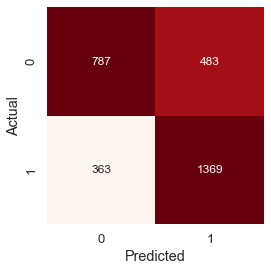

In [24]:
#Generate seaborn heatmap for the confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, tuned_y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size

### 7.2) Classification Report

In [25]:
print('\n\nTuned Model Stats:')
print(classification_report(y_test, tuned_y_pred, target_names=['class 0', 'class 1']))



Tuned Model Stats:
              precision    recall  f1-score   support

     class 0       0.68      0.62      0.65      1270
     class 1       0.74      0.79      0.76      1732

    accuracy                           0.72      3002
   macro avg       0.71      0.71      0.71      3002
weighted avg       0.72      0.72      0.72      3002



From here, Performance for class 1 is better with regard to recall, f1-score and precision which is 79%, 76% and 74% respectively in our case. Also, our accuracy is 72%, which means our model is 72% accurate.

### 7.3) ROC

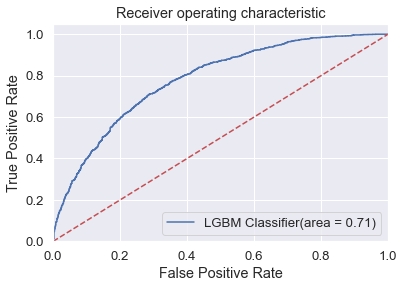

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

svm_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM Classifier(area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area under the ROC curve is a summary measure that essentially averages diagnostic accuracy across the spectrum of test values. That area under the curve is 71%, better the performance of the model at distinguishing between the positive and negative classes.

## 8) Out of sample prediction

In [27]:
#sample data (X_new)
X_new = df_unseen.drop(['Y'], axis=1)
target = df_unseen['Y']

# selecting features using variance threshold
vt = VarianceThreshold(threshold=.15)
vt.fit(X_new)
#VarianceThreshold(threshold=0.15)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=X_new.columns).T
X_2 = X_new.iloc[:,vt.get_support()]
print(X_2.shape)
X_2.head()


(600, 28)


,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Weather_Sunny,...,Education_Some college - no degree,Occupation_business_&_education,Occupation_others,Bar_less1,Bar_never,Coffeehouse_less1,Coffeehouse_never,Carryaway_4~8,Restaurantlessthan20_4~8,Restaurant20to50_less1
0,80,1.000,0,0,14,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1
1,55,1.000,1,0,7,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,55,0.084,0,0,14,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1
3,55,1.000,1,0,14,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,80,1.000,1,0,14,2,1,0,1,1,...,0,0,0,0,1,0,0,1,0,1


#### 8.1) Making Prediction

In [28]:
y_pred = clf.predict(X_2)
y_pred

print(y_pred)
#append to test data

test_data = pd.concat([X_2, target], axis=1)

test_data['y_pred'] = y_pred
test_data

[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 1 1 1 1 1 1 

,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Weather_Sunny,...,Occupation_others,Bar_less1,Bar_never,Coffeehouse_less1,Coffeehouse_never,Carryaway_4~8,Restaurantlessthan20_4~8,Restaurant20to50_less1,Y,y_pred
0,80,1.000,0,0,14,1,1,0,1,1,...,0,0,1,1,0,1,1,1,0,1
1,55,1.000,1,0,7,1,0,1,0,1,...,0,1,0,0,0,0,0,1,1,1
2,55,0.084,0,0,14,1,1,0,1,1,...,1,0,0,0,0,1,0,1,0,1
3,55,1.000,1,0,14,1,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1
4,80,1.000,1,0,14,2,1,0,1,1,...,0,0,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,30,1.000,0,0,18,1,0,0,0,1,...,1,0,1,0,0,0,0,1,1,1
596,30,1.000,1,0,18,1,1,0,0,0,...,0,1,0,0,1,1,0,1,0,0
597,30,1.000,1,1,7,1,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
598,30,1.000,1,0,7,3,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0


In [29]:
pred_prob = clf.predict_proba(X_2)
print(pred_prob)

[[0.46551759 0.53448241]
 [0.16278983 0.83721017]
 [0.3488592  0.6511408 ]
 ...
 [0.85777403 0.14222597]
 [0.5548586  0.4451414 ]
 [0.80560732 0.19439268]]


Here, it shows the probability of whether a person will accept the coupon recommended in different driving scenarios. The columns on left side, shows respone as '0' and column on right shows response as '1'. In each case, such as [0.46551759 0.53448241], the probability on right side is higher as compared to the left column. So, in the case, the predicted probability for this one is 1.

In [30]:
test_data["pred_prob"] = clf.predict_proba(X_2)[:,1]

In [31]:
test_data

,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Weather_Sunny,...,Bar_less1,Bar_never,Coffeehouse_less1,Coffeehouse_never,Carryaway_4~8,Restaurantlessthan20_4~8,Restaurant20to50_less1,Y,y_pred,pred_prob
0,80,1.000,0,0,14,1,1,0,1,1,...,0,1,1,0,1,1,1,0,1,0.534482
1,55,1.000,1,0,7,1,0,1,0,1,...,1,0,0,0,0,0,1,1,1,0.837210
2,55,0.084,0,0,14,1,1,0,1,1,...,0,0,0,0,1,0,1,0,1,0.651141
3,55,1.000,1,0,14,1,1,0,0,1,...,0,1,0,0,1,0,1,1,1,0.942793
4,80,1.000,1,0,14,2,1,0,1,1,...,0,1,0,0,1,0,1,1,1,0.950755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,30,1.000,0,0,18,1,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0.804346
596,30,1.000,1,0,18,1,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0.340130
597,30,1.000,1,1,7,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,0.142226
598,30,1.000,1,0,7,3,0,1,0,0,...,1,0,0,1,1,0,1,0,0,0.445141


From above dataset, we can see the column pred_prob, showed the probability and column Y_pred showed the values of pred_prob in exact response in the form of 0 or 1 based on the higher probability. Whereas, column Y indicated the actual response and Y_pred shows the predicted response.

#### 8.2) Confusion Metric

In [32]:

confusion_matrix = confusion_matrix(target, y_pred)
print(confusion_matrix)

[[179  96]
 [ 42 283]]


From the confusion matrix, we can see that we have 462(179+283) predictions that are predicted correctly. Whereas, we have 138(42+96) predictions that are not predicted correctly.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

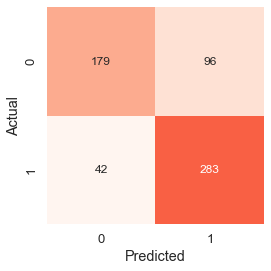

In [33]:
#Generate seaborn heatmap for the confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(target, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(target), index = np.unique(target))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size

#### 8.3) Classification Report

In [34]:
print('\n\nTuned Model Stats:')
print(classification_report(target, y_pred, target_names=['class 0', 'class 1']))



Tuned Model Stats:
              precision    recall  f1-score   support

     class 0       0.81      0.65      0.72       275
     class 1       0.75      0.87      0.80       325

    accuracy                           0.77       600
   macro avg       0.78      0.76      0.76       600
weighted avg       0.78      0.77      0.77       600



From here, Performance for class 1 is better with regard to recall and f1-score which is 87% and 80% respectively in our case. Also, our accuracy is 77%, which means our model is 77% accurate.

#### 8.4) ROC

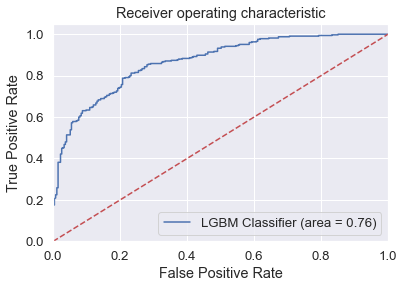

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

svm_roc_auc = roc_auc_score(target, y_pred)
fpr, tpr, thresholds = roc_curve(target, clf.predict_proba(X_2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM Classifier (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area under the ROC curve is a summary measure that essentially averages diagnostic accuracy across the spectrum of test values. That area under the curve is 76%, better the performance of the model at distinguishing between the positive and negative classes.

## 9) Conclusion

The unseen dataset accuracy is greater than training accuracy which is 77%. This means that the model has generalized fine. Using GridSearchCV, we get accuracy/loss for every combination of hyper parameters, and we can choose the one with the best performance. In our case, it is LGBM classifier. As if our model is imbalanced then f1-score will take care of that. We can also try stratified sampling in future to improve the performance of the model.